<a href="https://colab.research.google.com/github/MaryAdewunmi/ExamResult-Prediction/blob/main/Predicting_Exam_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This Project predicts the results of Candidates based on 2 distinct features,daily self study and monthly tutoring with a specific Teacher.** 

***Import necessary Libraries***

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**[Import datasets**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Exam_Test.xlsx to Exam_Test.xlsx


In [ ]:
data = pd.read_excel('Exam_Test.xlsx')

In [ ]:
data.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [ ]:
X = data.drop('Pass_Or_Fail',axis = 1)
y = data.Pass_Or_Fail

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 4)

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[79,  5],
       [ 0, 87]])

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
r2_score(y_test, y_pred)

0.8830049261083743

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.029239766081871343

**Mean Absolute Error(MAE) is the difference between predicted values and the actual values**

In [ ]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)


0.9702380952380952

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

97.07602339181285

**97.08 means the model is very accurate**

---



In [ ]:
Candidate1 = LR.predict((np.array([2,2]).reshape(1,-1)))
Candidate1

array([1])

**array[1] means PASS, array[0] means FAIL. Obviously, Candidate 1 will pass the Exam**

**Check out the relationship between the two(2) features**

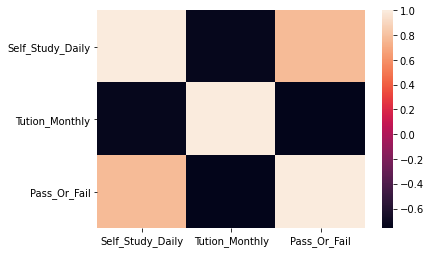

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())


In [19]:
data.columns

Index(['Self_Study_Daily', 'Tution_Monthly', 'Pass_Or_Fail'], dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


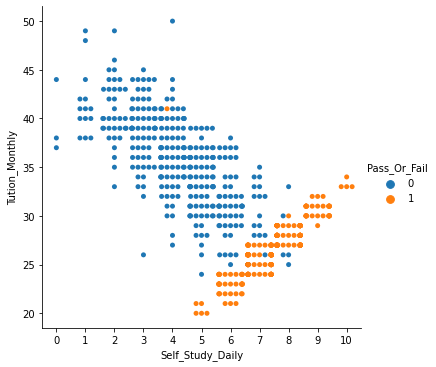

In [26]:
sns.catplot(data=data, x="Self_Study_Daily", y="Tution_Monthly", hue="Pass_Or_Fail",kind = "swarm")

**This Lab is done by Mary Adewunmi.**